<a href="https://colab.research.google.com/github/Romit-Ghosh/Machine-Learning-/blob/main/Romit_Ghosh_B51_Prac5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
file_path = '/bank - bank.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [7]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [8]:
# Distribution of continuous variables
continuous_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

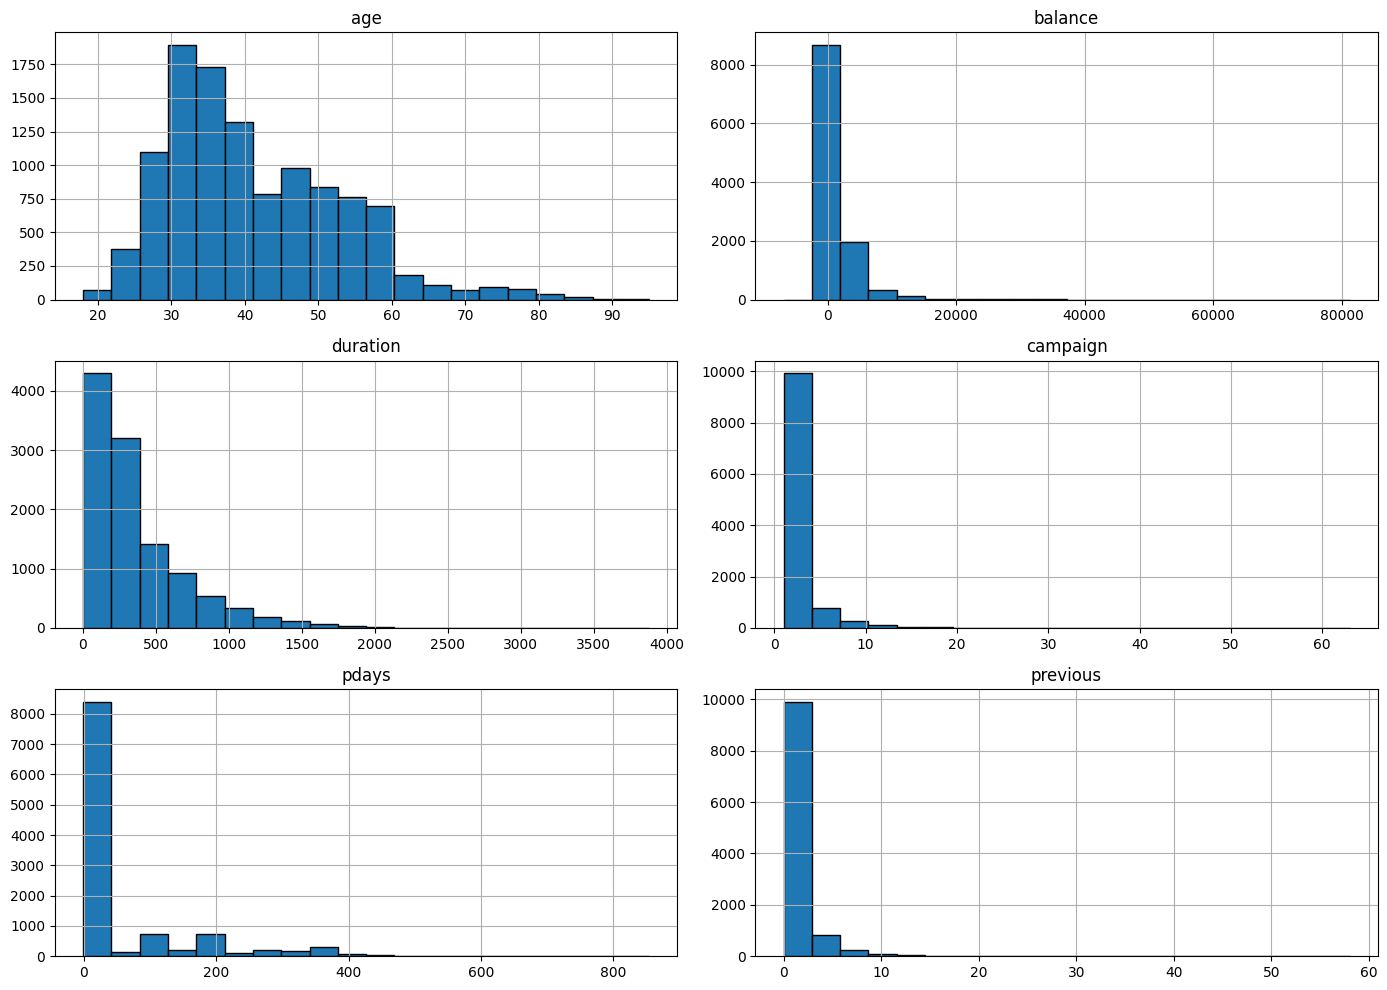

In [9]:
# Plotting histograms for continuous variables
df[continuous_columns].hist(bins=20, figsize=(14,10), layout=(3, 2), edgecolor='black')
plt.tight_layout()
plt.show()

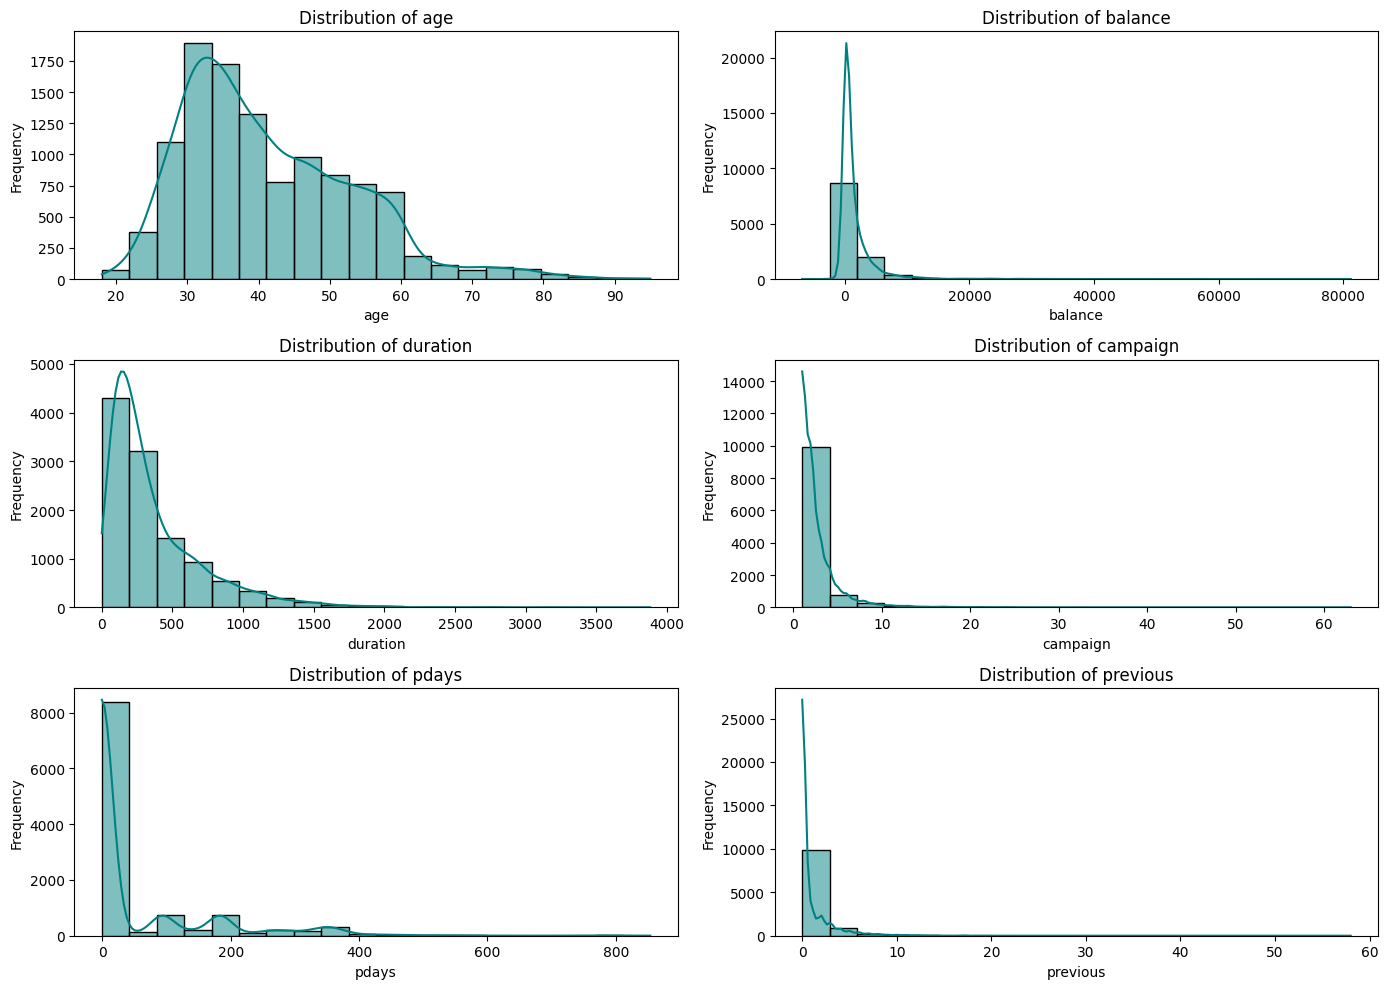

In [11]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(continuous_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(x=df[col], bins=20, kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

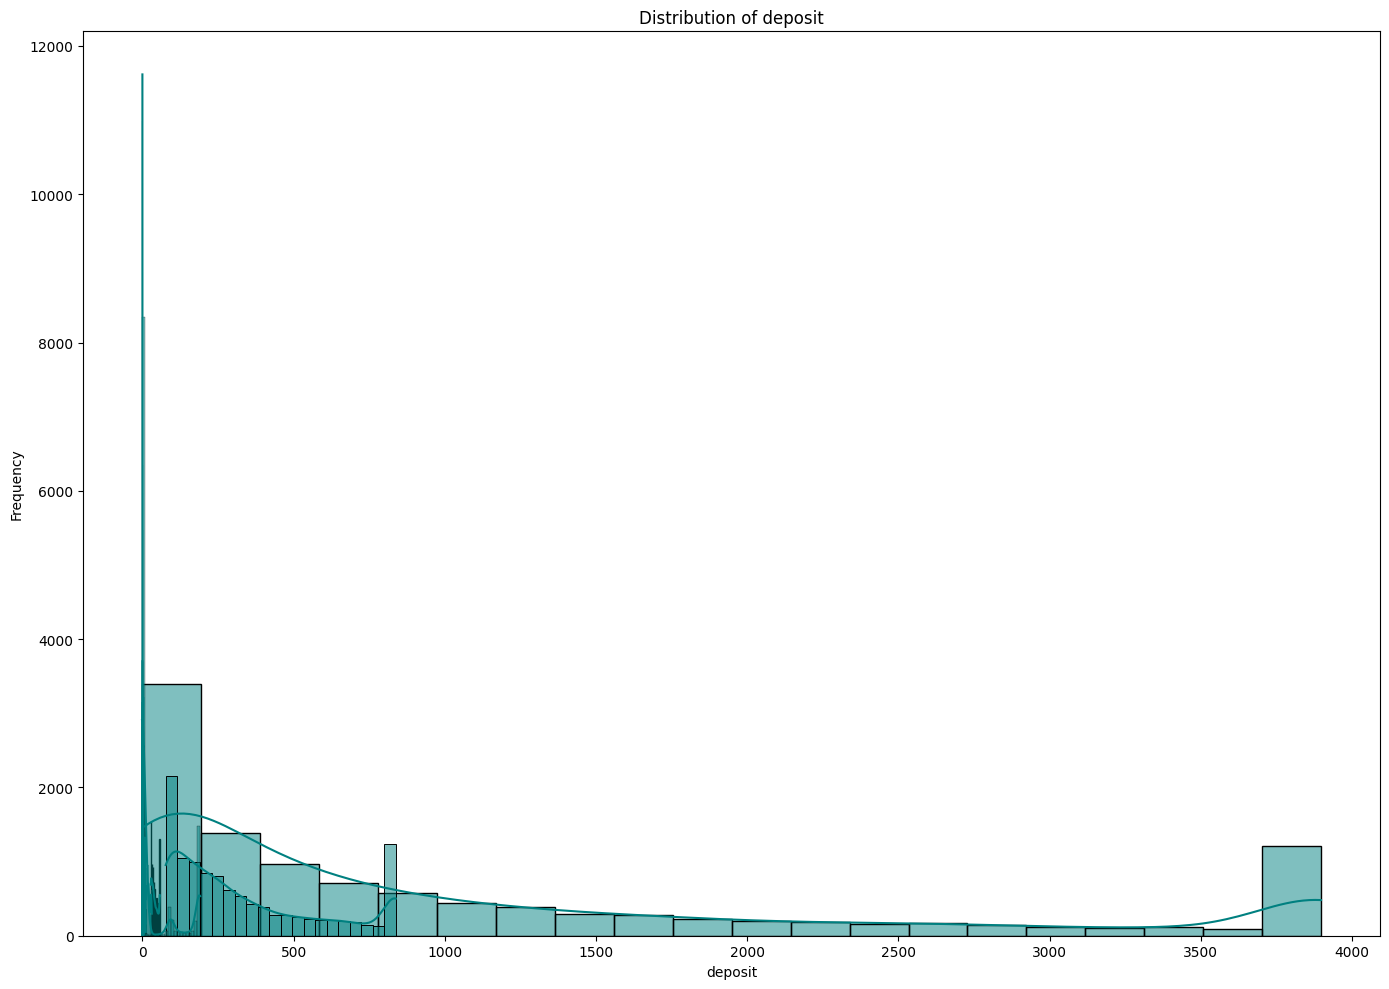

In [30]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(df.columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(x=df[col], bins=20, kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

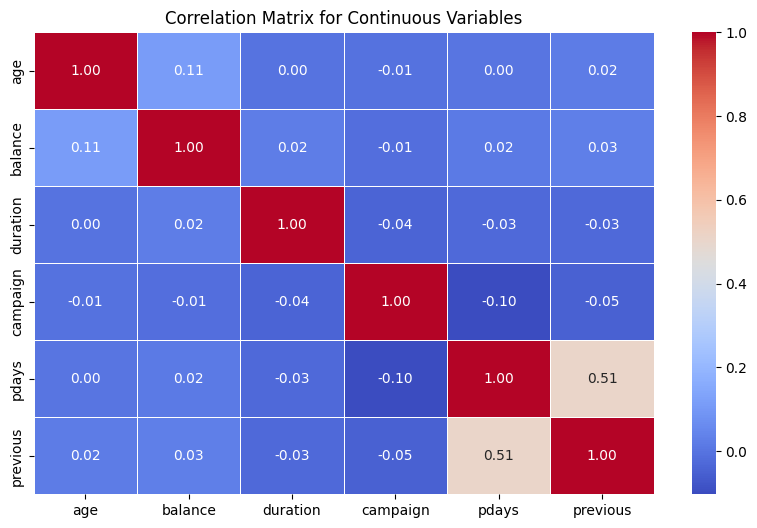

In [14]:
# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[continuous_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.6)
plt.title('Correlation Matrix for Continuous Variables')
plt.show()

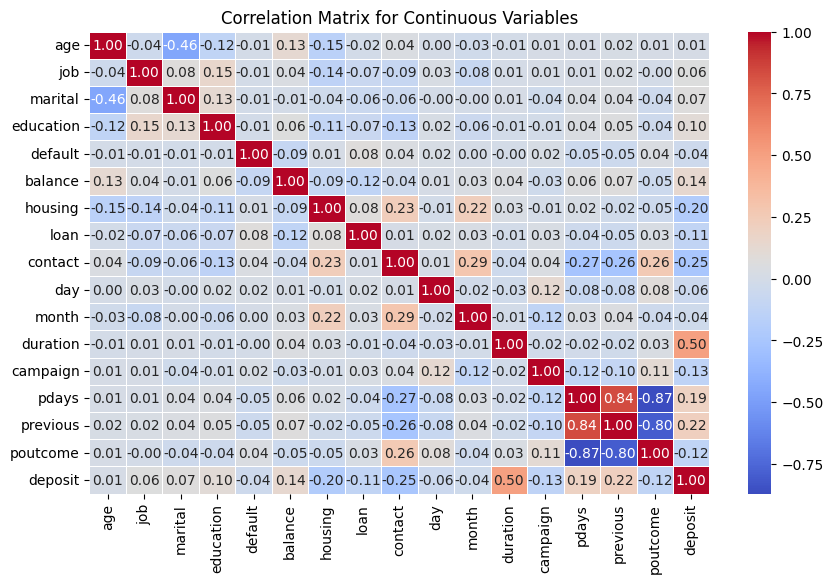

In [31]:
# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.6)
plt.title('Correlation Matrix for Continuous Variables')
plt.show()

<ipython-input-33-c0b12c6a9ead>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df, palette='viridis')


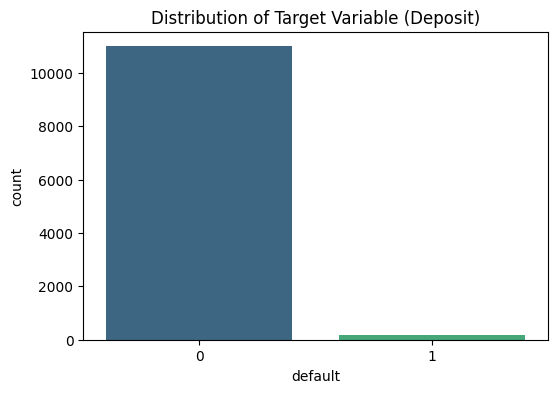

In [33]:
# Distribution of target variable 'Distribution'
plt.figure(figsize=(6,4))
sns.countplot(x='default', data=df, palette='viridis')
plt.title('Distribution of Target Variable (Deposit)')
plt.show()

# **BIVARIATE/ MULTIVARIATE ANALYSIS**



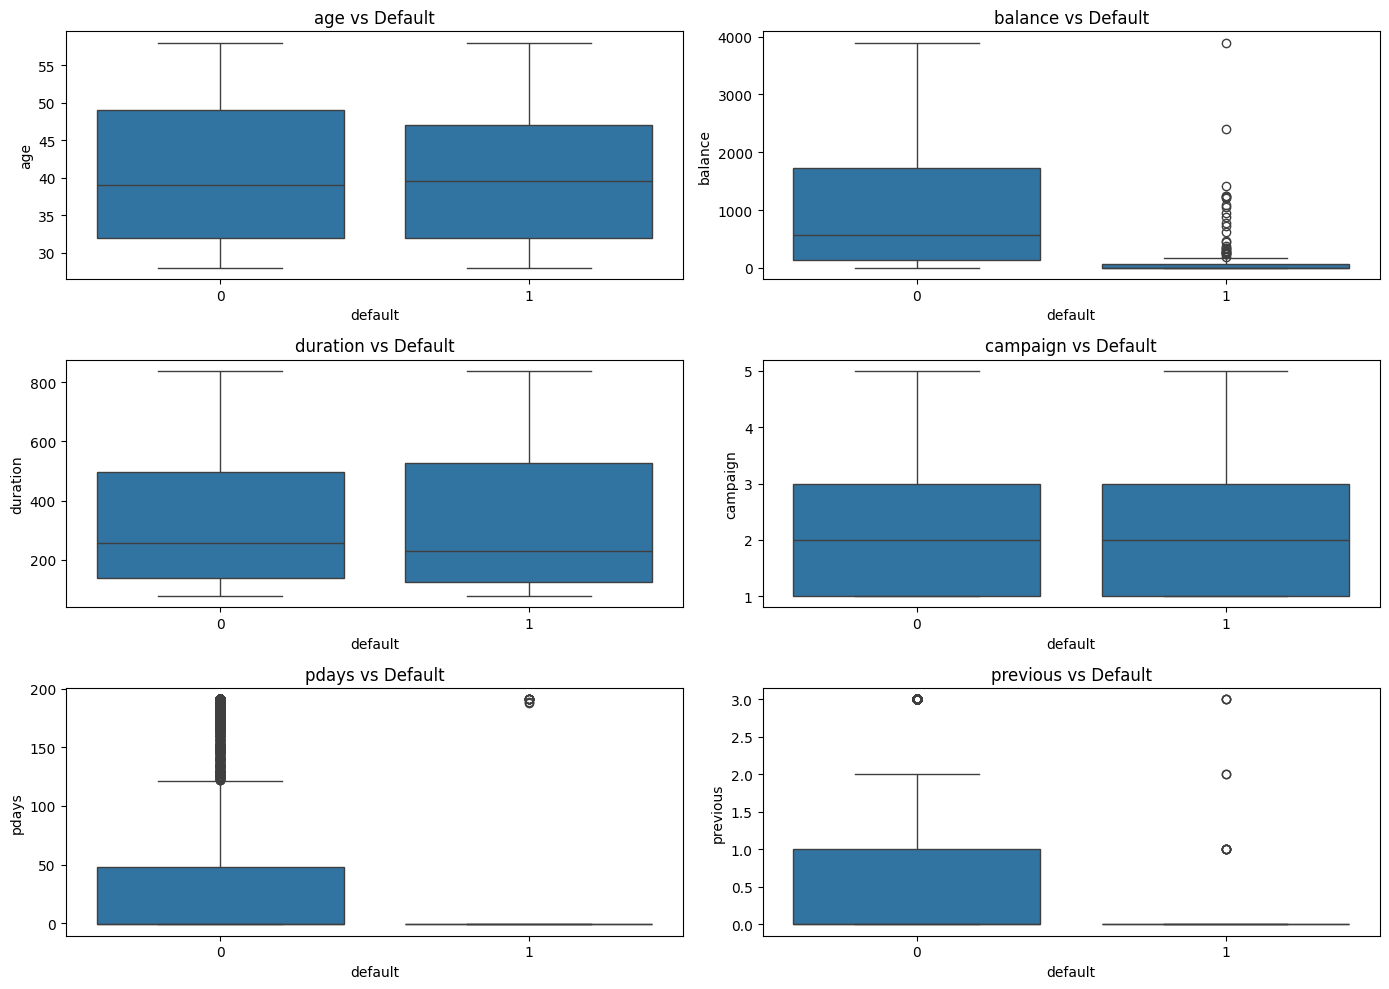

In [32]:
# Plotting boxplots for continuous variables against the target variable (deposit)
plt.figure(figsize=(14, 10))

for i, col in enumerate(continuous_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='default', y=col, data=df)
    plt.title(f'{col} vs Default')

plt.tight_layout()
plt.show()

<Axes: >

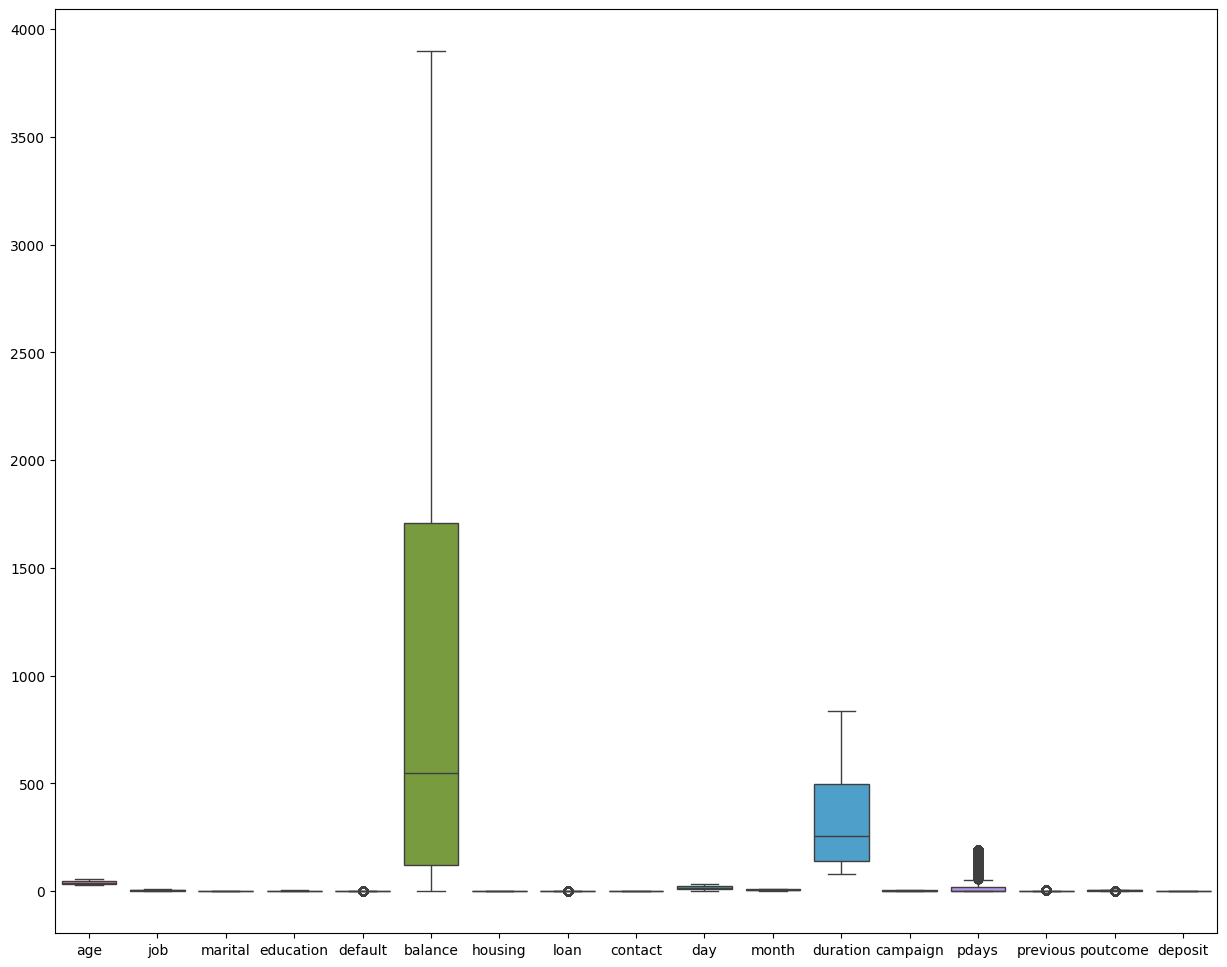

In [34]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df)

In [35]:
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in df:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in job attribute : []
Outliers in marital attribute : []
Outliers in education attribute : []
Outliers in default attribute : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Outliers in balance attribute : []
Outliers in housing attribute : []
Outliers in loan attribute : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [36]:
def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in df:
    df[i]=handle_outliers(df[i])

<Axes: >

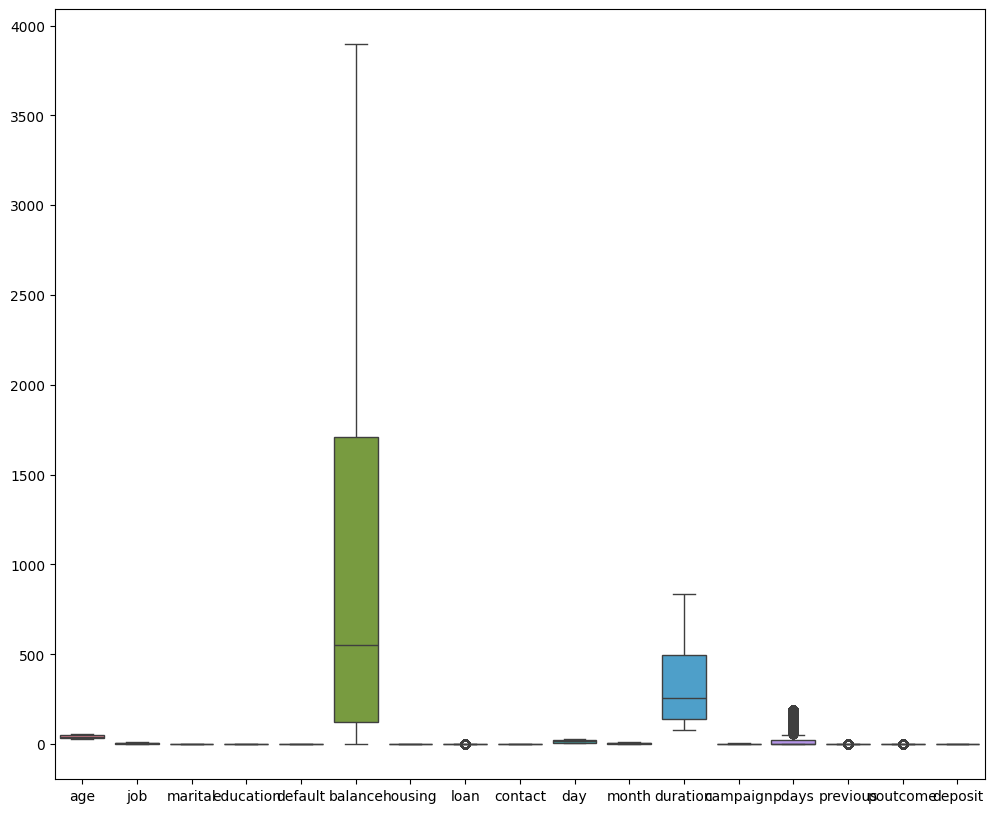

In [37]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df)

In [38]:
sns.pairplot(df, hue='deposit')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7871f89fdab0> (for post_execute):


KeyboardInterrupt: 

# **Preprocessing**

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
# Split the data into features and target
X = df.drop('default', axis=1)
y = df['default']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train

array([[-1.283416  ,  1.13346574,  1.27746077, ...,  2.41672276,
        -2.4871858 ,  1.05587616],
       [-0.68058473, -0.14030125, -0.32321945, ..., -0.52451997,
         0.51634166, -0.94708076],
       [ 0.72602156,  1.45190748, -1.92389966, ...,  0.45589427,
        -0.48483416,  1.05587616],
       ...,
       [-0.58011286,  1.45190748, -0.32321945, ..., -0.52451997,
         0.51634166, -0.94708076],
       [ 1.0274372 ,  0.1781405 , -0.32321945, ..., -0.52451997,
         0.51634166,  1.05587616],
       [-1.08247225, -0.14030125,  1.27746077, ..., -0.52451997,
         0.51634166, -0.94708076]])

#**MODEL TRAINING**

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Predictions
rf_predictions = rf_model.predict(X_test)

In [51]:
# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions) * 100, "%")

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2233

    accuracy                           1.00      2233
   macro avg       1.00      1.00      1.00      2233
weighted avg       1.00      1.00      1.00      2233

Accuracy: 100.0 %


# **OBSERVATION**-
## RandomForest algorithm gives an accuracy of **100%** without even hyperparameter tuning.

In [52]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Predictions
ada_predictions = ada_model.predict(X_test)

# Evaluation
print("AdaBoost Classification Report:")
print(classification_report(y_test, ada_predictions))
print("Accuracy:", accuracy_score(y_test, ada_predictions) * 100, "%")

AdaBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2233

    accuracy                           1.00      2233
   macro avg       1.00      1.00      1.00      2233
weighted avg       1.00      1.00      1.00      2233

Accuracy: 100.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# **OBSERVATION**-
## Adaboost algorithm gives an accuracy of **100%** without even hyperparameter tuning.


# **Using ARTIFICIAL NEURAL NETWORKS -**

In [53]:
from keras.models import Sequential
from keras.layers import Dense

In [54]:
# Build ANN model
ann_model = Sequential()
ann_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # Binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
# Train the model
ann_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9888 - loss: 0.0927
Epoch 2/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 2.4423e-04
Epoch 3/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 6.5198e-05
Epoch 4/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 2.5320e-05
Epoch 5/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 1.2487e-05
Epoch 6/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 1.0000 - loss: 6.4418e-06
Epoch 7/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.4506e-06
Epoch 8/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 2.1357e-06
Epoch 9/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.1761e-06
Epoch 10/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 7.2196e-07
Epoch 11/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 4.2312e-07
Epoch 12/50


In [59]:
ann_predictions = ann_model.predict(X_test).astype("int32")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [60]:
# Evaluation
print("ANN Classification Report:")
print(classification_report(y_test, ann_predictions))
print("Accuracy:", accuracy_score(y_test, ann_predictions) * 100, "%")

ANN Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2233

    accuracy                           1.00      2233
   macro avg       1.00      1.00      1.00      2233
weighted avg       1.00      1.00      1.00      2233

Accuracy: 100.0 %


# **OBSERVATION**-
## ANN gives an accuracy of **100%** without even hyperparameter tuning.
